## - To compare multiple files for files under a same directory

In [1]:
ProblemDirLine = '/Users/ranchu/FLASHOR/Movies_n_Data/dele_1D_2S/Chimera_S25_100ms_Fluid/CS25100ms_BTr_staticFluid_CB/'
ProblemDirLine2 = '48X40E_1_12_LS220' # will be used as title
FileIndex    = [0,100,300,500]
nSpecies = 2

In [2]:
%matplotlib notebook
import flashytlib.plot as fyplt
import flashytlib.calculator as fycal
import numpy as np

# default
filenamebase = '/deleptonizationwave_hdf5_chk_'
directory  = ProblemDirLine + ProblemDirLine2

fnum = len(FileIndex)
fullfilenames = fnum*['?']
for i in range(fnum):
    fileindex = FileIndex[i]
    fullfilenames[i] = directory + filenamebase + '{:04d}'.format(fileindex)

# memory allocation
AverageEnergy     = fnum * nSpecies * ['?']
AverageFluxFactor = fnum * nSpecies * ['?']
Luminosity        = fnum * nSpecies * ['?']
NumberDensity     = fnum * nSpecies * ['?']
EnergyDensity     = fnum * nSpecies * ['?']
FluxDensity       = fnum * nSpecies * ['?']
J                 = fnum * nSpecies * ['?']
H1                = fnum * nSpecies * ['?']

for i in range(fnum):
    filename = fullfilenames[i]
    print(filename)
    for ii in range(nSpecies):
        print('index =',ii+i*nSpecies)
        
        [NumberDensity[ii+i*nSpecies], EnergyDensity[ii+i*nSpecies], \
         AverageEnergy[ii+i*nSpecies], J[ii+i*nSpecies], ECenter, Radius] \
        = fycal.ReadMoment_Zeroth(filename, directory, iSpecies=ii+1)
        
        [FluxDensity[ii+i*nSpecies], Luminosity[ii+i*nSpecies], H1[ii+i*nSpecies], ECenter, Radius] \
        = fycal.ReadMoment_First(filename, directory, iSpecies=ii+1)
        
        AverageFluxFactor[ii+i*nSpecies] \
        = np.true_divide(FluxDensity[ii+i*nSpecies],EnergyDensity[ii+i*nSpecies])

/Users/ranchu/FLASHOR/Movies_n_Data/dele_1D_2S/Chimera_S25_100ms_Fluid/CS25100ms_BTr_staticFluid_CB/48X40E_1_12_LS220/deleptonizationwave_hdf5_chk_0000
index = 0
index = 1
/Users/ranchu/FLASHOR/Movies_n_Data/dele_1D_2S/Chimera_S25_100ms_Fluid/CS25100ms_BTr_staticFluid_CB/48X40E_1_12_LS220/deleptonizationwave_hdf5_chk_0100
index = 2
index = 3
/Users/ranchu/FLASHOR/Movies_n_Data/dele_1D_2S/Chimera_S25_100ms_Fluid/CS25100ms_BTr_staticFluid_CB/48X40E_1_12_LS220/deleptonizationwave_hdf5_chk_0300
index = 4
index = 5
/Users/ranchu/FLASHOR/Movies_n_Data/dele_1D_2S/Chimera_S25_100ms_Fluid/CS25100ms_BTr_staticFluid_CB/48X40E_1_12_LS220/deleptonizationwave_hdf5_chk_0500
index = 6
index = 7


# First, plots the overall behavior using mean number density and mean flux factor

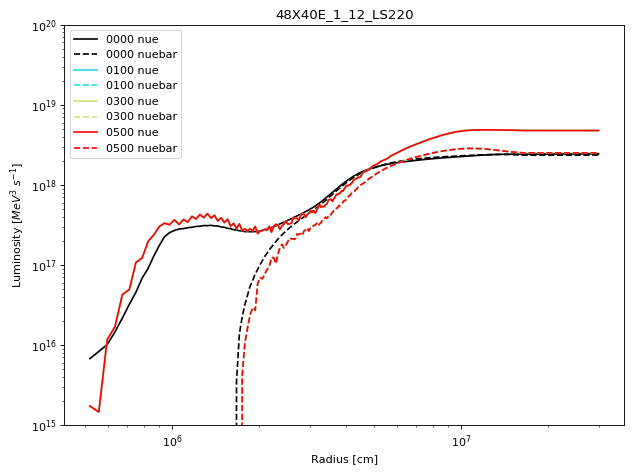

In [10]:
%matplotlib inline 
# notebook or inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

labels = ['nue','nuebar']
LineType     = ['solid','dashed']

# ============ figure 1 =============
colors = cm.rainbow(np.linspace(0, 1, fnum))
colors[0] = [0,0,0,1] # black the initial
LineTypes = ['solid','dashdot', 'dashed','dotted'] # rolling in use

fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax1.set_title(ProblemDirLine2)
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel(r'Luminosity [$MeV^3$ $s^{-1}$]')
lns = fnum *nSpecies* ['?']
for i in range(fnum*nSpecies):
    leg = '{:04d} '.format(FileIndex[i//nSpecies])+labels[i%nSpecies]
    lns[i] = ax1.plot(Radius,Luminosity[i], \
                      linestyle=LineType[i%nSpecies],color=colors[i//nSpecies],label=leg)
ax1.set_yscale('log')
ax1.set_ylim([1.0e15, 1.0e20])
ax1.set_xscale('log')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc='upper left')
plt.show()


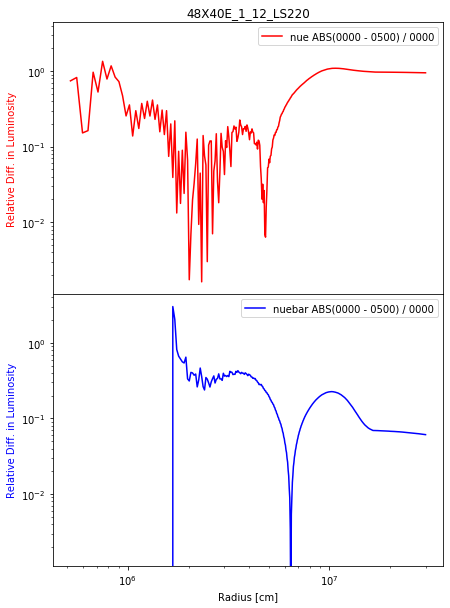

In [4]:
# ============ figure 2 =============
base_i  = [0,1]
comp_i  = [6,7]
labels  = ['nue','nuebar']
colors  = ['red','blue']
RelativeDiff_Luminosity = ['?']*2

for i in range(2):
    RelativeDiff_Luminosity[i]= abs(Luminosity[base_i[i]]-Luminosity[comp_i[i]])/Luminosity[base_i[i]]

fig, axs = plt.subplots(2, sharex=True, sharey=True, gridspec_kw={'hspace': 0},\
                       figsize=(7, 10))

lns = 2 *['?']
title = ProblemDirLine2

for i in range(2):
    leg =labels[i] + ' ABS('+ '{:04d}'.format(FileIndex[base_i[i]//nSpecies])\
    +' - '+'{:04d}'.format(FileIndex[comp_i[i]//nSpecies]) + \
    ') / '+'{:04d}'.format(FileIndex[base_i[i]//nSpecies])

    axs[i].plot(Radius,RelativeDiff_Luminosity[i],\
                      color=colors[i],label=leg)
    axs[i].set_ylabel('Relative Diff. in Luminosity',color=colors[i])
    axs[i].legend(loc='upper right')
    
axs[1].set_xlabel('Radius [cm]')

axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_title(title)

plt.show()

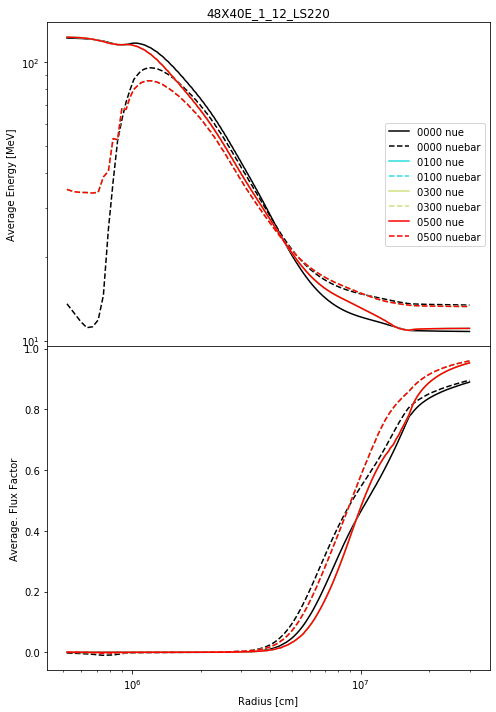

In [5]:
%matplotlib inline 
# notebook or inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

labels = ['nue','nuebar']
LineType     = ['solid','dashed']

# ============ figure 1 =============
colors = cm.rainbow(np.linspace(0, 1, fnum))
colors[0] = [0,0,0,1] # black the initial
LineTypes = ['solid','dashdot', 'dashed','dotted'] # rolling in use

#fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0},\
                       figsize=(7, 10))
# --- Number Density ---
axs[0].set_title(ProblemDirLine2)
axs[1].set_xlabel('Radius [cm]')
axs[0].set_ylabel('Average Energy [MeV]')
lns = 2*fnum *nSpecies* ['?']
for i in range(fnum*nSpecies):
    leg = '{:04d} '.format(FileIndex[i//nSpecies])+labels[i%nSpecies]
    lns[i] = axs[0].plot(Radius,AverageEnergy[i], \
                      linestyle=LineType[i%nSpecies],color=colors[i//nSpecies],label=leg)
axs[0].set_yscale('log')
axs[0].set_xscale('log')

# --- Average Flux Factor ---
axs[1].set_ylabel('Average. Flux Factor')
axs[1].set_yscale('linear')
for i in range(fnum*nSpecies):
    lns[i+fnum*nSpecies] = axs[1].plot(Radius,AverageFluxFactor[i], \
                      linestyle=LineType[i%nSpecies],color=colors[i//nSpecies],label=leg)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
axs[0].legend(loc='right')
#plt.show()
plt.savefig(ProblemDirLine+ProblemDirLine2+'/IfStationary.png')



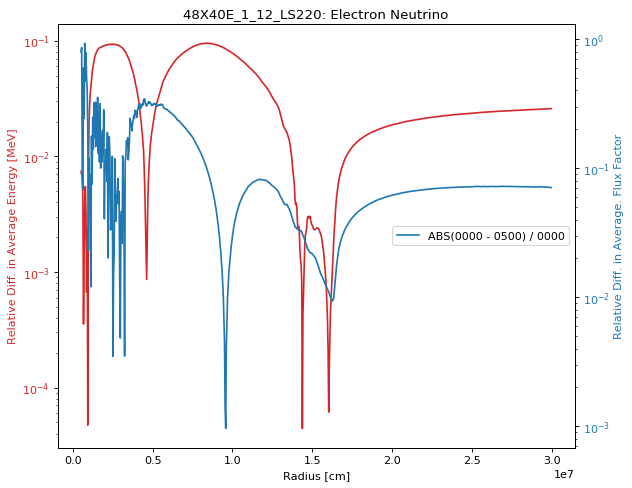

In [6]:
# ============ figure 2 =============
base_i = 0
comp_i = 6

RelativeDiff_AverageEnergy= abs(AverageEnergy[base_i]-AverageEnergy[comp_i])/AverageEnergy[base_i]
RelativeDiff_AverageFluxFactor= abs(AverageFluxFactor[base_i]-AverageFluxFactor[comp_i])/abs(AverageFluxFactor[base_i])

import matplotlib.pyplot as plt

LineType     = ['solid','dashdot', 'dashed','dotted','dashdot']
#fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# --- Number Density ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Relative Diff. in Average Energy [MeV]',color=color)
lns = 2*fnum *['?']
leg = 'ABS('+ '{:04d}'.format(FileIndex[base_i//nSpecies]) \
+' - '+'{:04d}'.format(FileIndex[comp_i//nSpecies])
leg = leg + ') / '+'{:04d}'.format(FileIndex[base_i//nSpecies])
lns[0] = ax1.plot(Radius,RelativeDiff_AverageEnergy,linestyle=LineType[0],color=color,label=leg)

ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
# --- Average Flux Factor ---
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Relative Diff. in Average. Flux Factor', color=color)
lns[1] = ax2.plot(Radius, RelativeDiff_AverageFluxFactor,linestyle=LineType[0], color=color,label=leg)

ax2.set_yscale('log')    
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#ax1.legend(loc='upper left')
ax2.legend(loc='right')

ax1.set_title(ProblemDirLine2+': Electron Neutrino')
plt.savefig(ProblemDirLine+ProblemDirLine2+'/IfStationary_RelaDiff_neutrino.png')

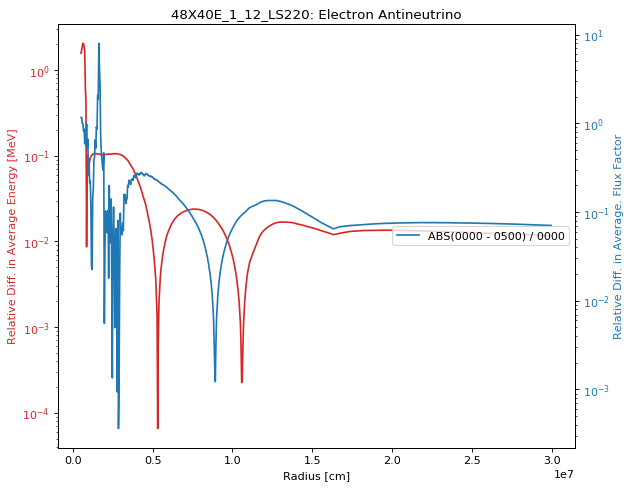

In [7]:
# ============ figure 2 =============
base_i = 1
comp_i = 7

RelativeDiff_AverageEnergy= abs(AverageEnergy[base_i]-AverageEnergy[comp_i])/AverageEnergy[base_i]
RelativeDiff_AverageFluxFactor= abs(AverageFluxFactor[base_i]-AverageFluxFactor[comp_i])/abs(AverageFluxFactor[base_i])

import matplotlib.pyplot as plt

LineType     = ['solid','dashdot', 'dashed','dotted','dashdot']
#fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# --- Number Density ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Relative Diff. in Average Energy [MeV]',color=color)
lns = 2*fnum *['?']
leg = 'ABS('+ '{:04d}'.format(FileIndex[base_i//nSpecies])+' - '+'{:04d}'.format(FileIndex[comp_i//nSpecies])
leg = leg + ') / '+'{:04d}'.format(FileIndex[base_i//nSpecies])
lns[0] = ax1.plot(Radius,RelativeDiff_AverageEnergy,linestyle=LineType[0],color=color,label=leg)

ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
# --- Average Flux Factor ---
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Relative Diff. in Average. Flux Factor', color=color)
lns[1] = ax2.plot(Radius, RelativeDiff_AverageFluxFactor,linestyle=LineType[0], color=color,label=leg)

ax2.set_yscale('log')    
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#ax1.legend(loc='upper left')
ax2.legend(loc='right')

ax1.set_title(ProblemDirLine2+': Electron Antineutrino')
plt.savefig(ProblemDirLine+ProblemDirLine2+'/IfStationary_RelaDiff_antineutrino.png')